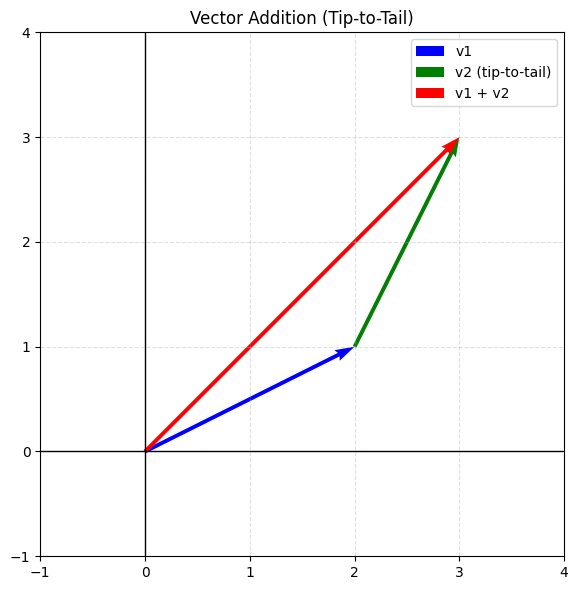

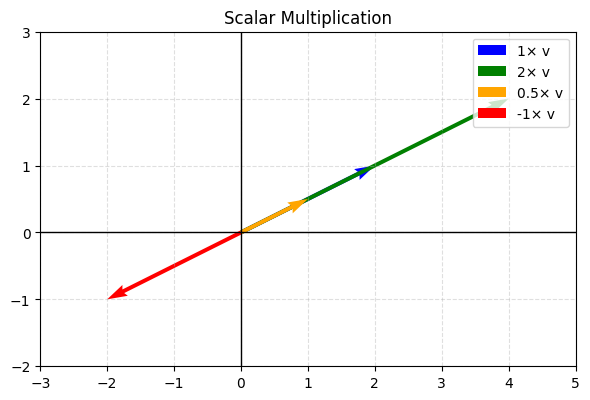

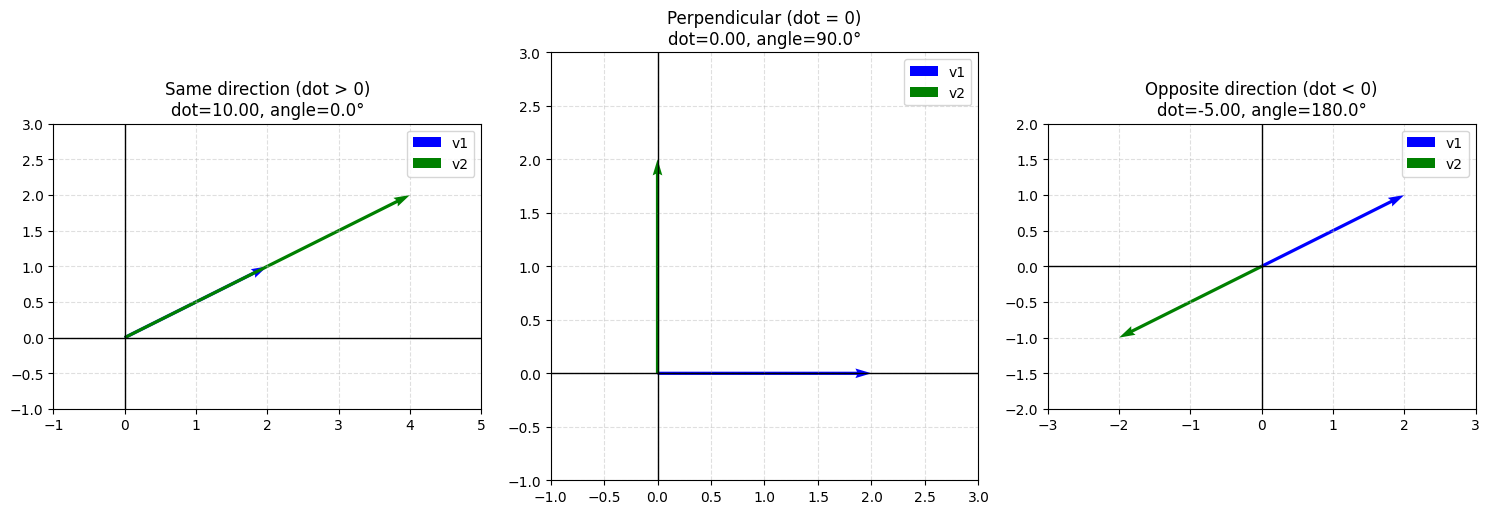

In [2]:
"""
Vector Visualization
"""
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
from src.vector import Vector

def plot_vector(ax, vector: Vector, origin=(0, 0), color='blue', label=None):
    """
    Plot a 2D vector as an arrow.

    Args:
        ax: Matplotlib axes.
        vector: Vector to plot (must be 2D).
        origin: Starting point (x, y).
        color: Arrow color.
        label: Optional label for legend.
    """
    ox, oy = origin
    dx, dy = vector.components[0], vector.components[1]

    kwargs = dict(angles="xy", scale_units="xy", scale=1, color=color)
    if label is not None:
        kwargs["label"] = label
    return ax.quiver(ox, oy, dx, dy, **kwargs)


def visualize_addition():
    """
    Visualize vector addition (tip-to-tail method).

    Create:
    1. Vector v1 from origin
    2. Vector v2 starting from tip of v1
    3. Result vector (sum) from origin to final tip
    """
    v1 = Vector([2, 1])
    v2 = Vector([1, 2])
    v_sum = v1 + v2
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    origin = (0, 0)
    tip_v1 = (v1.components[0], v1.components[1])
    
    plot_vector(ax, v1, origin=origin, color="blue", label="v1")
    plot_vector(ax, v2, origin=tip_v1, color="green", label="v2 (tip-to-tail)")
    plot_vector(ax, v_sum, origin=origin, color="red", label="v1 + v2")
    
    points = np.array([
      [0, 0],
      [v1.components[0], v1.components[1]],
      [v_sum.components[0], v_sum.components[1]],
    ])
    x_min, y_min = points.min(axis=0)
    x_max, y_max = points.max(axis=0)
    pad = 1
    ax.set_xlim(x_min - pad, x_max + pad)
    ax.set_ylim(y_min - pad, y_max + pad)
    
    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linewidth=1)
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.set_title("Vector Addition (Tip-to-Tail)")
    ax.legend()
    plt.tight_layout()

    return fig, ax



def visualize_scalar_multiplication():
    """
    Visualize scalar multiplication.

    Show same vector scaled by different factors:
    - Original (scale = 1)
    - Doubled (scale = 2)
    - Halved (scale = 0.5)
    - Reversed (scale = -1)
    """
    v = Vector([2, 1])
    
    scales = [
      (1, "blue", "1× v"),
      (2, "green", "2× v"),
      (0.5, "orange", "0.5× v"),
      (-1, "red", "-1× v"),
    ]
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    origin = (0, 0)
    all_points = [(0, 0)]
    for s, color, label in scales:
      scaled = s * v
      plot_vector(ax, scaled, origin=origin, color=color, label=label)
      all_points.append((scaled.components[0], scaled.components[1]))
    
    points = np.array(all_points)
    x_min, y_min = points.min(axis=0)
    x_max, y_max = points.max(axis=0)
    pad = 1
    ax.set_xlim(x_min - pad, x_max + pad)
    ax.set_ylim(y_min - pad, y_max + pad)
    
    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linewidth=1)
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.set_title("Scalar Multiplication")
    ax.legend()
    plt.tight_layout()

    return fig, ax



def visualize_dot_product():
    """
    Visualize dot product relationship to angle.

    Show pairs of vectors with:
    - Same direction (dot > 0)
    - Perpendicular (dot = 0)
    - Opposite direction (dot < 0)
    """
    pairs = [
      ("Same direction (dot > 0)", Vector([2, 1]), Vector([4, 2])),
      ("Perpendicular (dot = 0)", Vector([2, 0]), Vector([0, 2])),
      ("Opposite direction (dot < 0)", Vector([2, 1]), Vector([-2, -1])),
    ]
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for ax, (title, v1, v2) in zip(axes, pairs):
      if v1.dimension != 2 or v2.dimension != 2:
          raise ValueError("visualize_dot_product only supports 2D vectors")
    
      a = np.array(v1.components, dtype=float)
      b = np.array(v2.components, dtype=float)
    
      dot = float(np.dot(a, b))
      cos_theta = dot / (np.linalg.norm(a) * np.linalg.norm(b))
      cos_theta = float(np.clip(cos_theta, -1.0, 1.0))
      angle = float(np.degrees(np.arccos(cos_theta)))
    
      plot_vector(ax, v1, origin=(0, 0), color="blue", label="v1")
      plot_vector(ax, v2, origin=(0, 0), color="green", label="v2")
    
      points = np.array([[0, 0], a, b])
      x_min, y_min = points.min(axis=0)
      x_max, y_max = points.max(axis=0)
      pad = 1
      ax.set_xlim(x_min - pad, x_max + pad)
      ax.set_ylim(y_min - pad, y_max + pad)
    
      ax.axhline(0, color="black", linewidth=1)
      ax.axvline(0, color="black", linewidth=1)
      ax.set_aspect("equal", adjustable="box")
      ax.grid(True, linestyle="--", alpha=0.4)
      ax.set_title(f"{title}\ndot={dot:.2f}, angle={angle:.1f}°")
      ax.legend()
    
    plt.tight_layout()
    return fig, axes



if __name__ == "__main__":
    # Run all visualizations
    visualize_addition()
    plt.savefig("vector_addition.png")

    visualize_scalar_multiplication()
    plt.savefig("scalar_multiplication.png")

    visualize_dot_product()
    plt.savefig("dot_product.png")